In [9]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')

ticker = 'AOT.BK'
start = dt.datetime.today() - dt.timedelta(504)
end = dt.datetime.today()
df = pd.DataFrame()
df[ticker] = web.DataReader(ticker, 'yahoo', start, end)['Adj Close']
df['benchmark'] = web.DataReader('', 'yahoo', start, end)['Adj Close']

In [10]:
df

,AOT.BK,benchmark
Date,,
2019-12-13,75.062561,NaN
2019-12-16,73.819809,NaN
2019-12-17,73.322701,NaN
2019-12-18,74.565460,NaN
2019-12-19,74.565460,NaN
...,...,...
2021-04-26,63.500000,NaN
2021-04-27,60.750000,NaN
2021-04-28,62.750000,NaN


<AxesSubplot:xlabel='Date'>

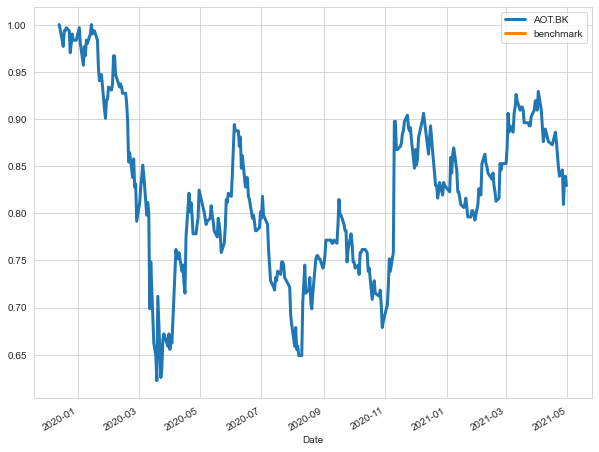

In [7]:
df[ticker] = df[ticker] / df[ticker].iloc[0]
df['benchmark'] = df['benchmark'] / df['benchmark'].iloc[0]
df[[ticker, 'benchmark']].plot(figsize=(10,8), lw=3)

<AxesSubplot:xlabel='backtest daily return', ylabel='benchmark daily return'>

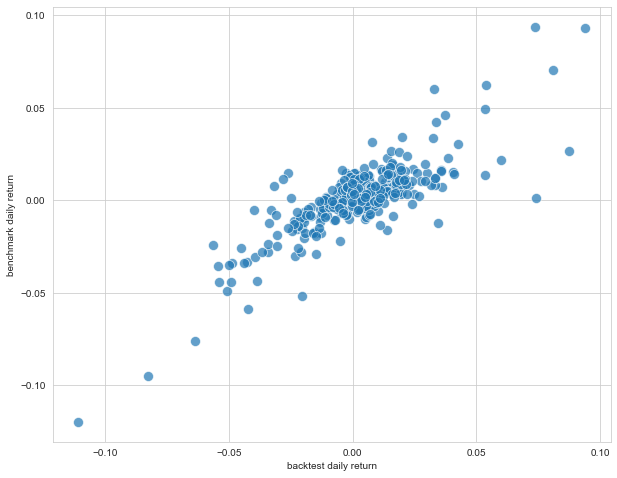

In [34]:
df['backtest daily return'] = df[ticker].pct_change(1)
df['benchmark daily return'] = df['benchmark'].pct_change(1)
plt.figure(figsize=(10,8))
sns.scatterplot(x='backtest daily return', y='benchmark daily return', data=df, alpha=0.7, s=100)

In [29]:
beta,alpha,r_value,p_value,std_err = stats.linregress(df['backtest daily return'].iloc[1:],df['benchmark daily return'].iloc[1:])
print(f'Stock name: {ticker}')
print(f'Beta: {beta:.4f}')
print(f'Alpha: {alpha:.4f}')
print(f'Correlation coefficient: {r_value:.4f}')

Stock name: GOOG
Beta: 0.6949
Alpha: -0.0002
Correlation coefficient: 0.8197
